## Ridge Regression

- Ridge Regression (also called Tikhonov regularization) is a regularized version of Linear Regression: a regularization term is added to the cost function.
- This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible.
- It is important to scale the data (e.g., using a StandardScaler) before performing Ridge Regression, as it is sensitive to the scale of the input features. This is true of most regularized models.

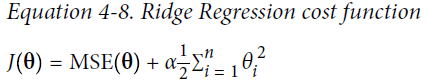

This notebook is my learning journal following the book: Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition, by Aurélien Géron (O’Reilly). Copyright 2019 Kiwisoft S.A.S., 978-1-492-03264-9.

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [12]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

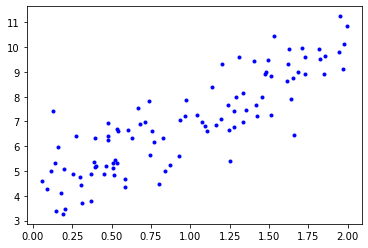

In [13]:
plt.plot(X, y, "b.")
plt.show()

Clearly, a straight line will never fit this data properly. So let’s use Scikit-Learn’s Polynomial Features class to transform our training data, adding the square (seconddegree polynomial) of each feature in the training set as a new feature (in this case there is just one feature)

### A Closed-Form Solution

In [14]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[8.41773556]])

In [15]:
y_predict = ridge_reg.predict(X)

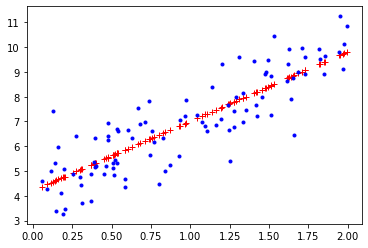

In [16]:
plt.plot(X, y_predict, "r+")
plt.plot(X, y, "b.")
plt.show()

In [23]:
mean_absolute_error(y, y_predict)

0.7784959287452538

### SGD to Add a Regularization Term - Ridge Regression
Specifying "l2" indicates that you want SGD to add a regularization term to the cost function equal to half the square of the ℓ2 norm of the weight vector: this is simply Ridge Regression.

In [18]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
y_predict_SGD = sgd_reg.predict(X)

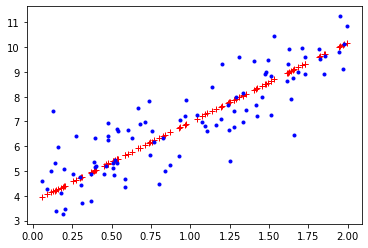

In [19]:
plt.plot(X, y_predict_SGD, "r+")
plt.plot(X, y, "b.")
plt.show()

In [22]:
mean_absolute_error(y, y_predict_SGD)

0.7738147305433735